In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Load data from CSV file
file_path = '/content/Online Retail.csv'
try:
    df = pd.read_csv(file_path, encoding='latin1')  # Using latin1 encoding as it's common for retail datasets
    print(f"✓ Successfully loaded data from {file_path}")
except FileNotFoundError:
    print(f"✗ File not found: {file_path}")
    print("Please check the file path and make sure the file exists.")
    exit()
except Exception as e:
    print(f"✗ Error loading file: {e}")
    print("Trying alternative encoding...")
    try:
        df = pd.read_csv(file_path, encoding='utf-8')
        print(f"✓ Successfully loaded data with UTF-8 encoding")
    except:
        print("✗ Failed to load data. Please check file format and encoding.")
        exit()

print("=== RETAIL DATA ANALYSIS ===\n")

✓ Successfully loaded data from /content/Online Retail.csv
=== RETAIL DATA ANALYSIS ===



In [ ]:
# Basic Data Information
print("1. DATASET OVERVIEW")
print("=" * 50)
print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print(f"Data types:\n{df.dtypes}")
print(f"\nFirst 5 rows:")
print(df.head())

1. DATASET OVERVIEW
Dataset shape: (541909, 8)
Columns: ['ï»¿InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']
Data types:
ï»¿InvoiceNo     object
StockCode        object
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID      float64
Country          object
dtype: object

First 5 rows:
  ï»¿InvoiceNo StockCode                          Description  Quantity  \
0       536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1       536365     71053                  WHITE METAL LANTERN         6   
2       536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3       536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4       536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

    InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/10 8:26       2.55     17850.0  United Kingdom  
1  12/1/10 8:26       3.39     17850

In [ ]:
# Data preprocessing
print("\n\n2. DATA PREPROCESSING")
print("=" * 50)

# Clean column names (remove any extra spaces)
df.columns = df.columns.str.strip()

# Display column names to understand the structure
print("Column names in dataset:")
print(df.columns.tolist())

# Handle potential data quality issues
print(f"\nOriginal dataset shape: {df.shape}")

# Remove rows with missing CustomerID (can't analyze customers without ID)
initial_rows = len(df)
df = df.dropna(subset=['CustomerID'])
print(f"Removed {initial_rows - len(df)} rows with missing CustomerID")

# Remove rows with negative or zero quantities (returns/cancellations)
df = df[df['Quantity'] > 0]
print(f"Dataset after cleaning: {df.shape}")

# Convert InvoiceDate to datetime (try multiple formats)
try:
    df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
    print("✓ Successfully converted InvoiceDate to datetime")
except:
    try:
        df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')
        print("✓ InvoiceDate converted using MM/DD/YYYY format")
    except:
        print("⚠ Date conversion might need manual adjustment")

print(f"Date range: {df['InvoiceDate'].min()} to {df['InvoiceDate'].max()}")

# Create additional features
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']
df['Hour'] = df['InvoiceDate'].dt.hour
df['Date'] = df['InvoiceDate'].dt.date
df['Month'] = df['InvoiceDate'].dt.month
df['Year'] = df['InvoiceDate'].dt.year
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()

print(f"Total revenue: ${df['TotalAmount'].sum():,.2f}")
print(f"Average transaction value: ${df['TotalAmount'].mean():.2f}")



2. DATA PREPROCESSING
Column names in dataset:
['ï»¿InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']

Original dataset shape: (541909, 8)
Removed 135080 rows with missing CustomerID
Dataset after cleaning: (397924, 8)
✓ Successfully converted InvoiceDate to datetime
Date range: 2010-12-01 08:26:00 to 2011-12-09 12:50:00
Total revenue: $8,911,407.90
Average transaction value: $22.39


In [ ]:
# Basic Statistics
print("\n\n3. DESCRIPTIVE STATISTICS")
print("=" * 50)
print("Numerical columns summary:")
print(df[['Quantity', 'UnitPrice', 'TotalAmount']].describe())

print(f"\nMissing values:")
print(df.isnull().sum())

print(f"\nUnique values per column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")



3. DESCRIPTIVE STATISTICS
Numerical columns summary:
            Quantity      UnitPrice    TotalAmount
count  397924.000000  397924.000000  397924.000000
mean       13.021823       3.116174      22.394749
std       180.420210      22.096788     309.055588
min         1.000000       0.000000       0.000000
25%         2.000000       1.250000       4.680000
50%         6.000000       1.950000      11.800000
75%        12.000000       3.750000      19.800000
max     80995.000000    8142.750000  168469.600000

Missing values:
ï»¿InvoiceNo    0
StockCode       0
Description     0
Quantity        0
InvoiceDate     0
UnitPrice       0
CustomerID      0
Country         0
TotalAmount     0
Hour            0
Date            0
Month           0
Year            0
DayOfWeek       0
dtype: int64

Unique values per column:
ï»¿InvoiceNo: 18536
StockCode: 3665
Description: 3877
Quantity: 302
InvoiceDate: 17286
UnitPrice: 441
CustomerID: 4339
Country: 37
TotalAmount: 2940
Hour: 15
Date: 305
Month: 12

In [ ]:
# Country Analysis
print("\n\n4. COUNTRY ANALYSIS")
print("=" * 50)
country_analysis = df.groupby('Country').agg({
    'TotalAmount': ['sum', 'mean', 'count'],
    'Quantity': 'sum',
    'CustomerID': 'nunique'
}).round(2)

country_analysis.columns = ['Total_Revenue', 'Avg_Order_Value', 'Num_Orders',
                           'Total_Quantity', 'Unique_Customers']
print(country_analysis)



4. COUNTRY ANALYSIS
                      Total_Revenue  Avg_Order_Value  Num_Orders  \
Country                                                            
Australia                 138521.31           116.90        1185   
Austria                    10198.68            25.62         398   
Bahrain                      548.40            32.26          17   
Belgium                    41196.34            20.28        2031   
Brazil                      1143.60            35.74          32   
Canada                      3666.38            24.28         151   
Channel Islands            20450.44            27.34         748   
Cyprus                     13590.38            22.13         614   
Czech Republic               826.74            33.07          25   
Denmark                    18955.34            49.88         380   
EIRE                      265545.90            36.69        7238   
European Community          1300.25            21.67          60   
Finland                   

In [ ]:
# Customer Analysis
print("\n\n5. CUSTOMER ANALYSIS")
print("=" * 50)
customer_analysis = df.groupby('CustomerID').agg({
    'TotalAmount': ['sum', 'mean', 'count'],
    'Quantity': 'sum',
    'Country': 'first'
}).round(2)

customer_analysis.columns = ['Total_Spent', 'Avg_Order_Value', 'Num_Orders',
                           'Total_Items', 'Country']
print("Top 5 customers by total spending:")
print(customer_analysis.sort_values('Total_Spent', ascending=False))



5. CUSTOMER ANALYSIS
Top 5 customers by total spending:
            Total_Spent  Avg_Order_Value  Num_Orders  Total_Items  \
CustomerID                                                          
14646.0       280206.02           134.71        2080       197491   
18102.0       259657.30           602.45         431        64124   
17450.0       194550.79           577.30         337        69993   
16446.0       168472.50         56157.50           3        80997   
14911.0       143825.06            25.33        5677        80515   
...                 ...              ...         ...          ...   
17956.0           12.75            12.75           1            1   
16454.0            6.90             3.45           2            3   
14792.0            6.20             3.10           2            2   
16738.0            3.75             3.75           1            3   
13256.0            0.00             0.00           1        12540   

                   Country  
CustomerID     

In [ ]:

# Product Analysis
print("\n\n6. PRODUCT ANALYSIS")
print("=" * 50)
product_analysis = df.groupby('Description').agg({
    'TotalAmount': 'sum',
    'Quantity': 'sum',
    'UnitPrice': 'mean'
}).round(2)

print("Top 10 products by revenue:")
print(product_analysis.sort_values('TotalAmount', ascending=False).head(10))

print("\nTop 10 products by quantity sold:")
print(product_analysis.sort_values('Quantity', ascending=False).head(10))



6. PRODUCT ANALYSIS
Top 10 products by revenue:
                                    TotalAmount  Quantity  UnitPrice
Description                                                         
PAPER CRAFT , LITTLE BIRDIE           168469.60     80995       2.08
REGENCY CAKESTAND 3 TIER              142592.95     12412      12.48
WHITE HANGING HEART T-LIGHT HOLDER    100448.15     36725       2.89
JUMBO BAG RED RETROSPOT                85220.78     46181       2.02
MEDIUM CERAMIC TOP STORAGE JAR         81416.73     77916       1.22
POSTAGE                                77803.96      3120      31.57
PARTY BUNTING                          68844.33     15295       4.87
ASSORTED COLOUR BIRD ORNAMENT          56580.34     35362       1.68
Manual                                 53779.93      7179     171.66
RABBIT NIGHT LIGHT                     51346.20     27202       2.01

Top 10 products by quantity sold:
                                    TotalAmount  Quantity  UnitPrice
Description       

In [ ]:
# =========================
# 7. TIME-BASED ANALYSIS
# =========================
print("\n\n7. TIME-BASED ANALYSIS")
print("=" * 50)

# Prepare aggregation dictionary
agg_dict = {
    'TotalAmount': 'sum',
    'Quantity': 'sum'
}

# Add unique orders count only if InvoiceNo column exists
if 'InvoiceNo' in df.columns:
    agg_dict['InvoiceNo'] = 'nunique'

# Group by Year & Month
monthly_sales = df.groupby(['Year', 'Month']).agg(agg_dict).round(2)

# Rename columns dynamically
rename_map = {
    'TotalAmount': 'Revenue',
    'Quantity': 'Units_Sold'
}
if 'InvoiceNo' in monthly_sales.columns:
    rename_map['InvoiceNo'] = 'Unique_Orders'

monthly_sales.rename(columns=rename_map, inplace=True)

print("Monthly sales summary:")
print(monthly_sales.head(10))

# -----------------------
# Sales by Day of Week
# -----------------------
dow_sales = df.groupby('DayOfWeek')['TotalAmount'].sum().round(2)

# Ensure proper weekday order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_sales = dow_sales.reindex([day for day in day_order if day in dow_sales.index])

print(f"\nSales by day of week:")
print(dow_sales)

# -----------------------
# Sales by Hour
# -----------------------
hourly_sales = df.groupby('Hour')['TotalAmount'].sum().round(2)
print(f"\nSales by hour:")
print(hourly_sales.head(10))

# -----------------------
# Key Insights
# -----------------------
print(f"\nPeak sales hour: {hourly_sales.idxmax()}:00 (${hourly_sales.max():,.2f})")
print(f"Best day of week: {dow_sales.idxmax()} (${dow_sales.max():,.2f})")

# -----------------------
# Visualization
# ----------




7. TIME-BASED ANALYSIS
Monthly sales summary:
              Revenue  Units_Sold
Year Month                       
2010 12     572713.89      312280
2011 1      569445.04      349147
     2      447137.35      265638
     3      595500.76      348544
     4      469200.36      292225
     5      678594.56      373685
     6      661213.69      363699
     7      600091.01      369432
     8      645343.90      398938
     9      952838.38      544899

Sales by day of week:
DayOfWeek
Monday       1367146.41
Tuesday      1700634.63
Wednesday    1588336.17
Thursday     1976859.07
Friday       1485917.40
Sunday        792514.22
Name: TotalAmount, dtype: float64

Sales by hour:
Hour
6           4.25
7       31059.21
8      282115.63
9      842605.17
10    1261192.57
11    1104558.75
12    1378571.48
13    1173264.75
14     995629.37
15     966191.75
Name: TotalAmount, dtype: float64

Peak sales hour: 12:00 ($1,378,571.48)
Best day of week: Thursday ($1,976,859.07)


In [ ]:
# Price Analysis
print("\n\n8. PRICE ANALYSIS")
print("=" * 50)
print(f"Price range: ${df['UnitPrice'].min():.2f} - ${df['UnitPrice'].max():.2f}")
print(f"Average unit price: ${df['UnitPrice'].mean():.2f}")
print(f"Median unit price: ${df['UnitPrice'].median():.2f}")

# Create price categories
df['PriceCategory'] = pd.cut(df['UnitPrice'],
                            bins=[0, 2, 5, 10, float('inf')],
                            labels=['Low (<$2)', 'Medium ($2-5)', 'High ($5-10)', 'Premium (>$10)'])

price_category_analysis = df.groupby('PriceCategory').agg({
    'TotalAmount': 'sum',
    'Quantity': 'sum',
    'Description': 'count'
}).round(2)
price_category_analysis.columns = ['Total_Revenue', 'Total_Quantity', 'Num_Products']
print("\nSales by price category:")
print(price_category_analysis)




8. PRICE ANALYSIS
Price range: $0.00 - $8142.75
Average unit price: $3.12
Median unit price: $1.95

Sales by price category:
                Total_Revenue  Total_Quantity  Num_Products
PriceCategory                                              
Low (<$2)          3625608.18         3811072        210795
Medium ($2-5)      3474710.32         1159876        135922
High ($5-10)       1143337.39          158748         40304
Premium (>$10)      667752.01           38116         10863


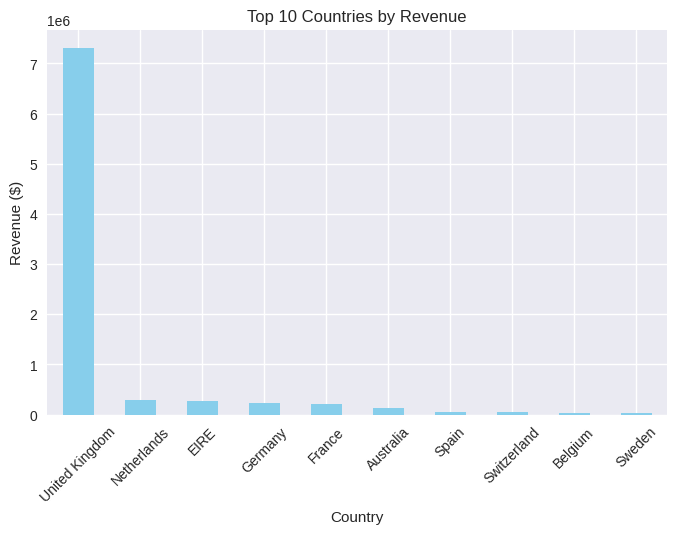

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8')


country_revenue = df.groupby('Country')['TotalAmount'].sum().nlargest(10)

plt.figure(figsize=(8, 5))
country_revenue.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries by Revenue')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)
plt.show()


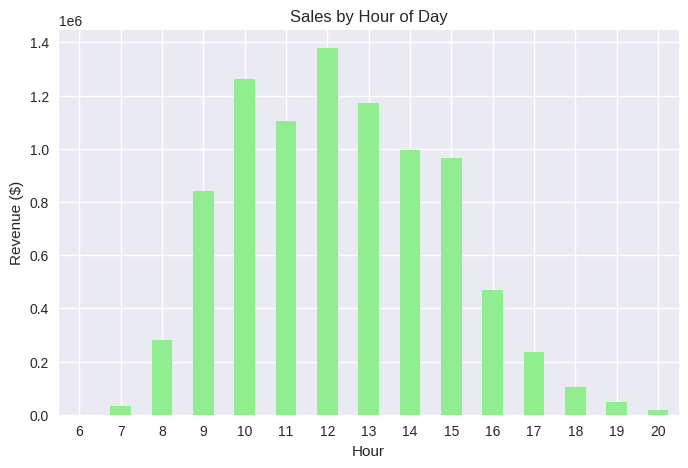

In [ ]:
plt.figure(figsize=(8, 5))
hourly_sales.plot(kind='bar', color='lightgreen')
plt.title('Sales by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=0)
plt.show()


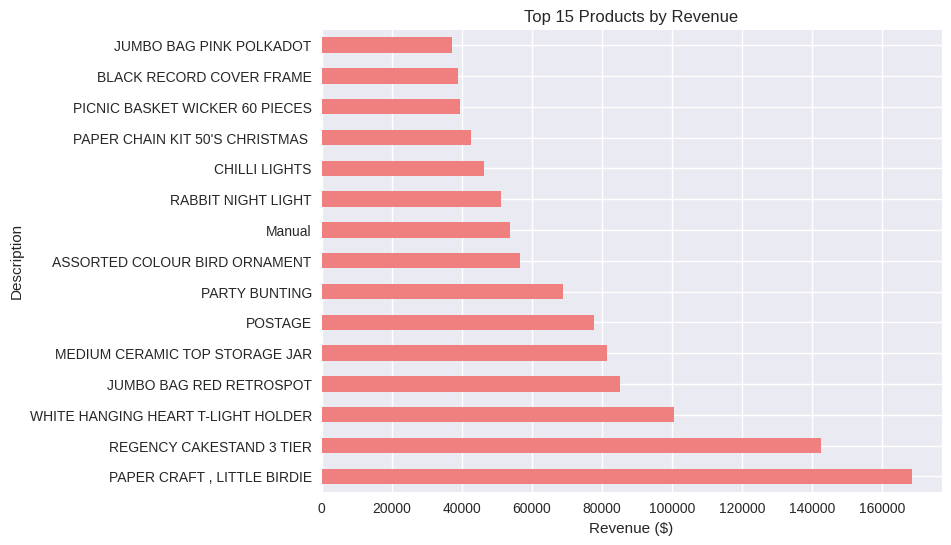

In [ ]:
top_products = df.groupby('Description')['TotalAmount'].sum().nlargest(15)

plt.figure(figsize=(8, 6))
top_products.plot(kind='barh', color='lightcoral')
plt.title('Top 15 Products by Revenue')
plt.xlabel('Revenue ($)')
plt.show()

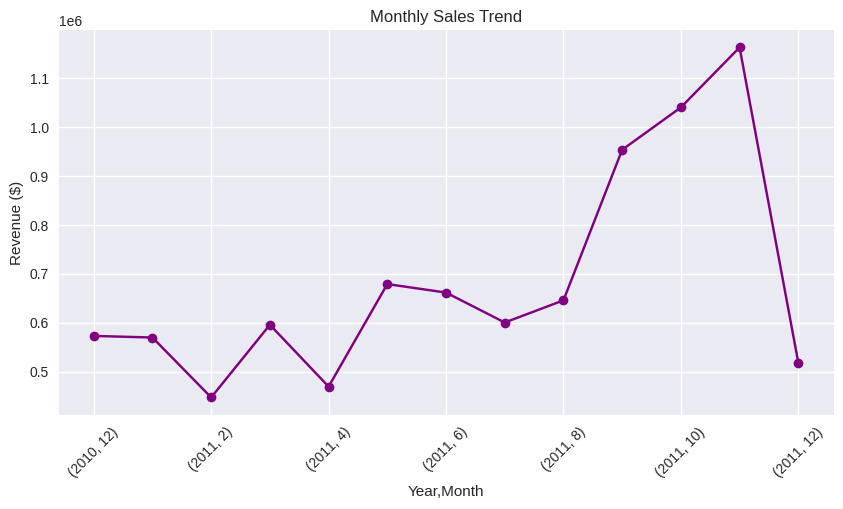

In [ ]:
monthly_trend = df.groupby(['Year', 'Month'])['TotalAmount'].sum()

plt.figure(figsize=(10, 5))
monthly_trend.plot(color='purple', marker='o')
plt.title('Monthly Sales Trend')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)
plt.show()

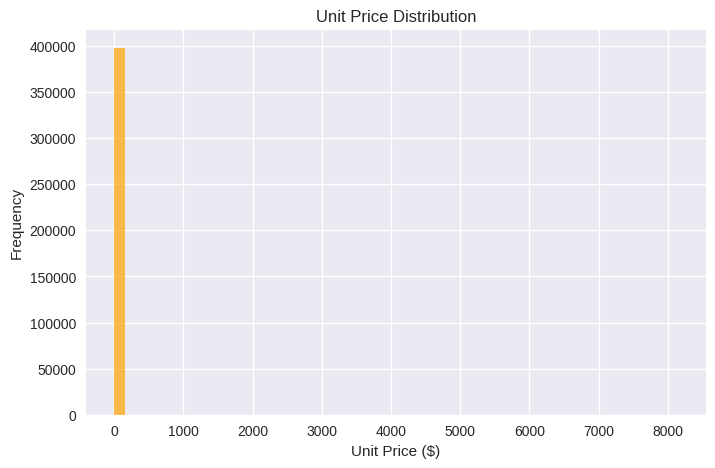

In [ ]:
plt.figure(figsize=(8, 5))
df['UnitPrice'].hist(bins=50, color='orange', alpha=0.7)
plt.title('Unit Price Distribution')
plt.xlabel('Unit Price ($)')
plt.ylabel('Frequency')
plt.show()

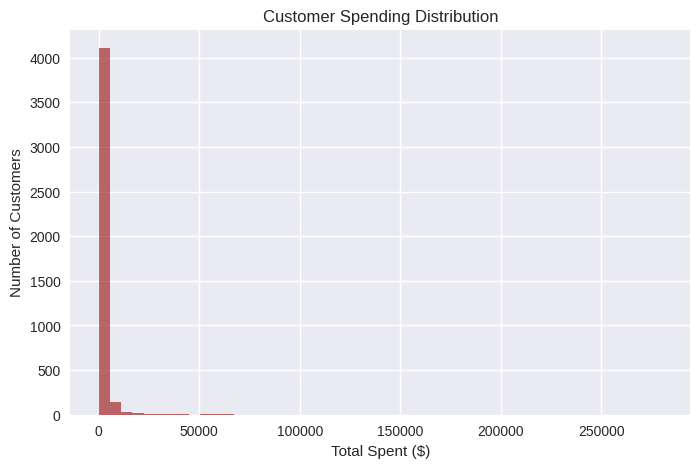

In [ ]:
customer_orders = df.groupby('CustomerID')['TotalAmount'].sum()

plt.figure(figsize=(8, 5))
customer_orders.hist(bins=50, color='brown', alpha=0.7)
plt.title('Customer Spending Distribution')
plt.xlabel('Total Spent ($)')
plt.ylabel('Number of Customers')
plt.show()


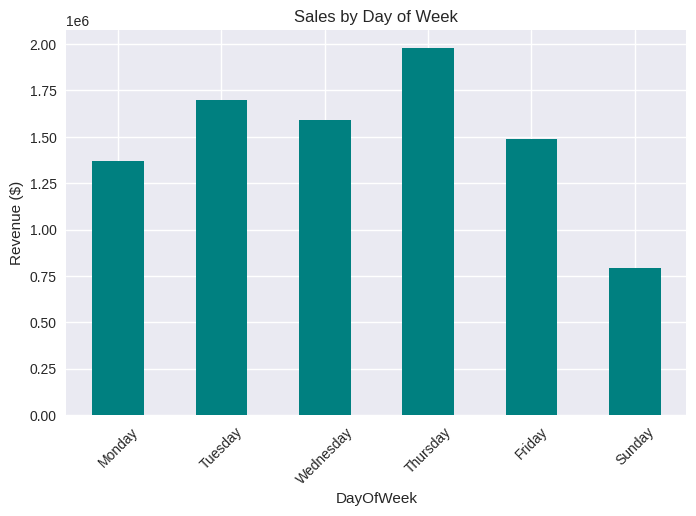

In [ ]:
if len(dow_sales) > 0:
    plt.figure(figsize=(8, 5))
    dow_sales.plot(kind='bar', color='teal')
    plt.title('Sales by Day of Week')
    plt.ylabel('Revenue ($)')
    plt.xticks(rotation=45)
    plt.show()



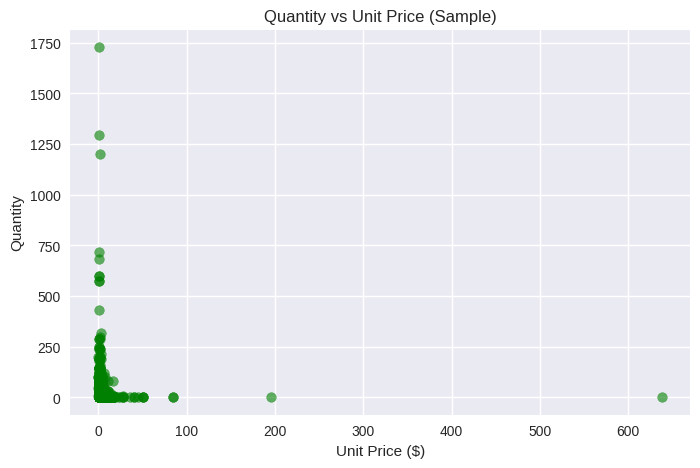

In [ ]:
sample_df = df.sample(n=min(5000, len(df))) if len(df) > 5000 else df

plt.figure(figsize=(8, 5))
plt.scatter(sample_df['UnitPrice'], sample_df['Quantity'], alpha=0.6, color='green')
plt.title('Quantity vs Unit Price (Sample)')
plt.xlabel('Unit Price ($)')
plt.ylabel('Quantity')
plt.show()


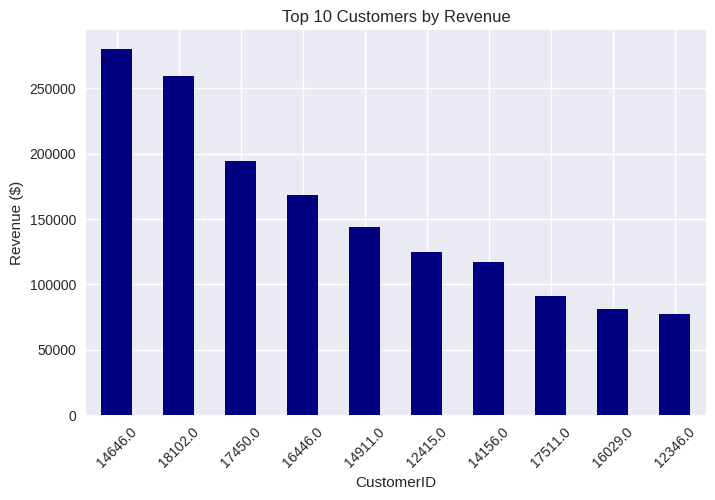

In [ ]:


top_customers = df.groupby('CustomerID')['TotalAmount'].sum().nlargest(10)

plt.figure(figsize=(8, 5))
top_customers.plot(kind='bar', color='navy')
plt.title('Top 10 Customers by Revenue')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Key Insights Summary
print("\n\n10. KEY INSIGHTS")
print("=" * 50)
print(f"• Dataset contains {len(df)} transactions from {df['CustomerID'].nunique()} unique customers")
print(f"• Sales across {df['Country'].nunique()} countries: {', '.join(df['Country'].unique())}")
print(f"• Total revenue: ${df['TotalAmount'].sum():.2f}")
print(f"• Average order value: ${df['TotalAmount'].mean():.2f}")
print(f"• Most active customer: {customer_analysis.sort_values('Num_Orders', ascending=False).index[0]}")
print(f"• Best-selling product: {product_analysis.sort_values('Quantity', ascending=False).index[0]}")
print(f"• Peak sales hour: {hourly_sales.idxmax()}:00 (${hourly_sales.max():.2f})")
print(f"• Price range: ${df['UnitPrice'].min():.2f} - ${df['UnitPrice'].max():.2f}")




10. KEY INSIGHTS
• Dataset contains 397924 transactions from 4339 unique customers
• Sales across 37 countries: United Kingdom, France, Australia, Netherlands, Germany, Norway, EIRE, Switzerland, Spain, Poland, Portugal, Italy, Belgium, Lithuania, Japan, Iceland, Channel Islands, Denmark, Cyprus, Sweden, Finland, Austria, Greece, Singapore, Lebanon, United Arab Emirates, Israel, Saudi Arabia, Czech Republic, Canada, Unspecified, Brazil, USA, European Community, Bahrain, Malta, RSA
• Total revenue: $8911407.90
• Average order value: $22.39
• Most active customer: 17841.0
• Best-selling product: PAPER CRAFT , LITTLE BIRDIE
• Peak sales hour: 12:00 ($1378571.48)
• Price range: $0.00 - $8142.75


In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

# Prepare data for basket analysis
basket = (df.groupby(['InvoiceNo', 'Description'])['Quantity']
            .sum().unstack().reset_index().fillna(0)
            .set_index('InvoiceNo'))

# Convert quantities to 0/1
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

# Generate frequent itemsets
frequent_itemsets = apriori(basket, min_support=0.02, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.sort_values("lift", ascending=False).head(10)


/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
70,"(ROSES REGENCY TEACUP AND SAUCER , GREEN REGEN...",(PINK REGENCY TEACUP AND SAUCER),0.029186,0.029996,0.021040,0.720887,24.033032,1.0,0.020165,3.475313,0.987204,0.551627,0.712256,0.711163
75,(PINK REGENCY TEACUP AND SAUCER),"(ROSES REGENCY TEACUP AND SAUCER , GREEN REGEN...",0.029996,0.029186,0.021040,0.701439,24.033032,1.0,0.020165,3.251641,0.988027,0.551627,0.692463,0.711163
72,"(ROSES REGENCY TEACUP AND SAUCER , PINK REGENC...",(GREEN REGENCY TEACUP AND SAUCER),0.023522,0.037279,0.021040,0.894495,23.994742,1.0,0.020163,9.124923,0.981409,0.529172,0.890410,0.729447
73,(GREEN REGENCY TEACUP AND SAUCER),"(ROSES REGENCY TEACUP AND SAUCER , PINK REGENC...",0.037279,0.023522,0.021040,0.564399,23.994742,1.0,0.020163,2.241683,0.995433,0.529172,0.553907,0.729447
8,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.037279,0.029996,0.024817,0.665702,22.193256,1.0,0.023698,2.901615,0.991919,0.584498,0.655364,0.746520
9,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.029996,0.037279,0.024817,0.827338,22.193256,1.0,0.023698,5.575760,0.984471,0.584498,0.820652,0.746520
71,"(GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY...",(ROSES REGENCY TEACUP AND SAUCER ),0.024817,0.042242,0.021040,0.847826,20.070631,1.0,0.019992,6.293837,0.974356,0.457210,0.841114,0.672955
74,(ROSES REGENCY TEACUP AND SAUCER ),"(GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY...",0.042242,0.024817,0.021040,0.498084,20.070631,1.0,0.019992,1.942923,0.992084,0.457210,0.485311,0.672955
62,(ROSES REGENCY TEACUP AND SAUCER ),(PINK REGENCY TEACUP AND SAUCER),0.042242,0.029996,0.023522,0.556833,18.563760,1.0,0.022255,2.188799,0.987861,0.482835,0.543129,0.670503
63,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.029996,0.042242,0.023522,0.784173,18.563760,1.0,0.022255,4.437611,0.975389,0.482835,0.774654,0.670503


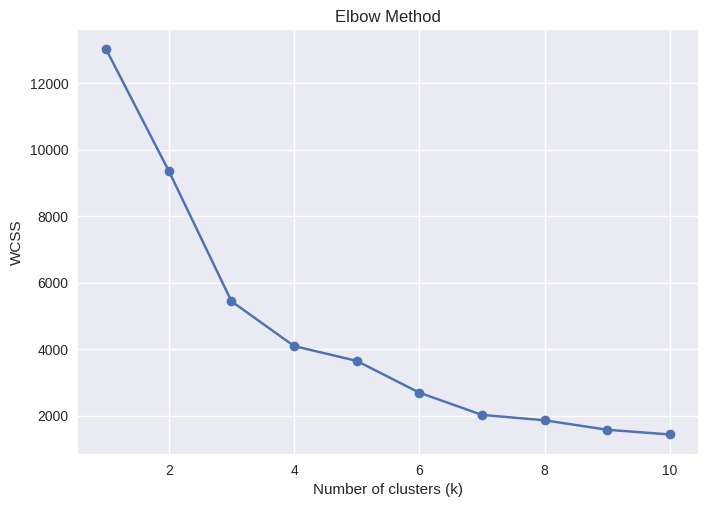

        Recency Frequency   Monetary      
           mean      mean       mean count
Cluster                                   
0         15.67     22.05   12453.23   211
1        248.56      1.55     478.11  1062
2          7.38     82.69  127338.31    13
3         43.91      3.66    1349.70  3053


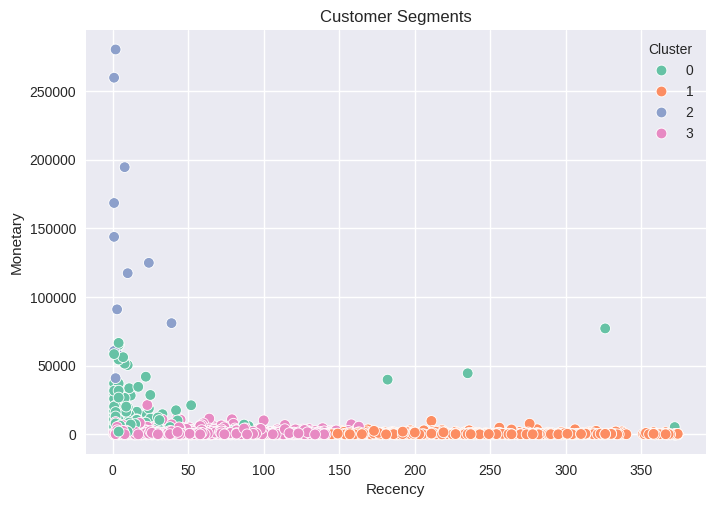

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from datetime import timedelta

# Fix BOM in InvoiceNo column (only if needed)
df.rename(columns={df.columns[0]: "InvoiceNo"}, inplace=True)

# RFM feature engineering
snapshot_date = df["InvoiceDate"].max() + timedelta(days=1)
rfm = df.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (snapshot_date - x.max()).days,  # Recency
    "InvoiceNo": "nunique",                                   # Frequency
    "TotalAmount": "sum"                                      # Monetary
}).reset_index()

rfm.columns = ["CustomerID", "Recency", "Frequency", "Monetary"]

# Scale data
X = rfm[["Recency", "Frequency", "Monetary"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Method to find best k
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

# Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
rfm["Cluster"] = kmeans.fit_predict(X_scaled)

# Cluster profiling
print(rfm.groupby("Cluster").agg({
    "Recency": "mean",
    "Frequency": "mean",
    "Monetary": ["mean", "count"]
}).round(2))

# Scatter plot
sns.scatterplot(data=rfm, x="Recency", y="Monetary", hue="Cluster", palette="Set2", s=60)
plt.title("Customer Segments")
plt.show()

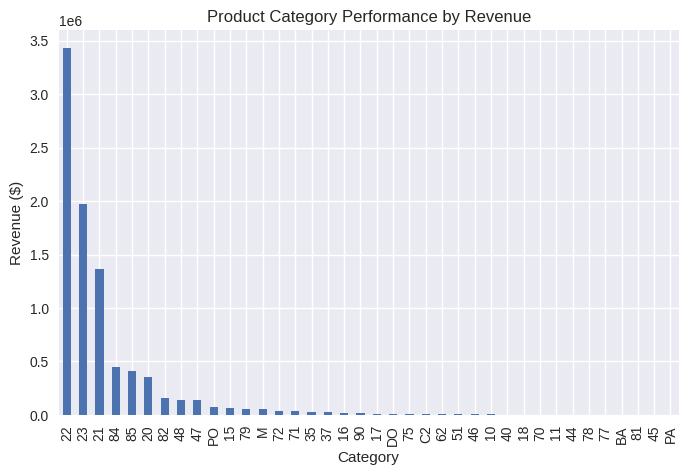

In [ ]:
# Example: using first 2 letters of StockCode as pseudo-category
df['Category'] = df['StockCode'].astype(str).str[:2]

category_performance = df.groupby('Category')['TotalAmount'].sum().sort_values(ascending=False)
category_performance.plot(kind='bar', figsize=(8,5))
plt.title("Product Category Performance by Revenue")
plt.ylabel("Revenue ($)")
plt.show()


In [ ]:
# Average purchase value
avg_purchase_value = df.groupby('CustomerID')['TotalAmount'].mean()

# Purchase frequency
purchase_freq = df.groupby('CustomerID')['InvoiceNo'].nunique() / df['CustomerID'].nunique()

# CLV = Avg purchase value * Purchase frequency * Assumed lifespan (e.g., 12 months)
clv = avg_purchase_value * purchase_freq * 12
clv = clv.sort_values(ascending=False)
clv.head(10)


,0
CustomerID,
16446.0,310.619959
12346.0,213.460060
15098.0,110.393639
17949.0,104.025481
18102.0,99.969176
17450.0,73.443358
16029.0,58.335774
15749.0,36.949408
16333.0,36.001512


In [ ]:
# Identify slow-moving items
product_sales = df.groupby('Description').agg({
    'Quantity': 'sum',
    'TotalAmount': 'sum'
}).sort_values('Quantity', ascending=False)

# Example: flag items in bottom 10% by sales quantity
threshold = product_sales['Quantity'].quantile(0.1)
slow_movers = product_sales[product_sales['Quantity'] <= threshold]
slow_movers.head()


,Quantity,TotalAmount
Description,,
LARGE JEWELLERY STAND,10,125.0
FLOWER BURST SILVER RING CRYSTAL,10,37.5
DIAMANTE HAIR GRIP PACK/2 RUBY,10,16.5
15 PINK FLUFFY CHICKS IN BOX,10,29.5
BEADED LOVE HEART JEWELLERY SET,10,8.5


from matplotlib import pyplot as plt
_df_0['TotalAmount'].plot(kind='hist', bins=20, title='TotalAmount')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Quantity']
  ys = series['TotalAmount']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('Quantity', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Quantity')
_ = plt.ylabel('TotalAmount')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Quantity']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Quantity'}, axis=1)
              .sort_values('Quantity', ascending=True))
  xs = counted['Quantity']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('Quantity', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Quantity')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_3['TotalAmount'].plot(kind='line', figsize=(8, 4), title='TotalAmount')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['TotalAmount'].plot(kind='hist', bins=20, title='TotalAmount')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_13.groupby('Description').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Quantity']
  ys = series['TotalAmount']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('Quantity', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Description')):
  _plot_series(series, series_name, i)
  fig.legend(title='Description', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Quantity')
_ = plt.ylabel('TotalAmount')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Quantity']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Quantity'}, axis=1)
              .sort_values('Quantity', ascending=True))
  xs = counted['Quantity']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_15.sort_values('Quantity', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Description')):
  _plot_series(series, series_name, i)
  fig.legend(title='Description', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Quantity')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_16['TotalAmount'].plot(kind='line', figsize=(8, 4), title='TotalAmount')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['Description'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='TotalAmount', y='Description', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

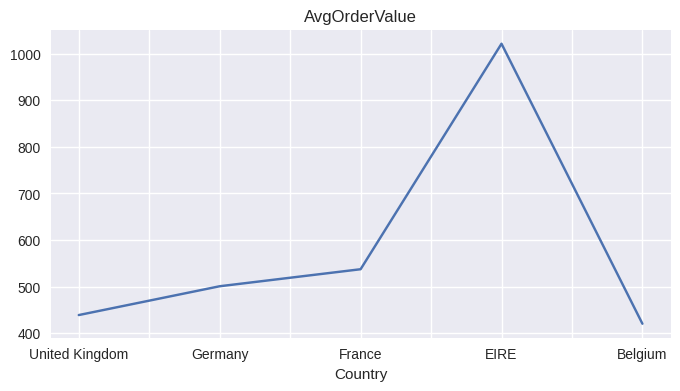

In [ ]:
from matplotlib import pyplot as plt
_df_11['AvgOrderValue'].plot(kind='line', figsize=(8, 4), title='AvgOrderValue')
plt.gca().spines[['top', 'right']].set_visible(False)

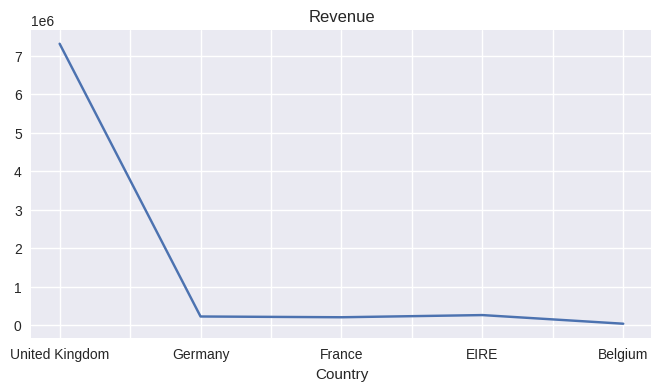

In [ ]:
from matplotlib import pyplot as plt
_df_10['Revenue'].plot(kind='line', figsize=(8, 4), title='Revenue')
plt.gca().spines[['top', 'right']].set_visible(False)

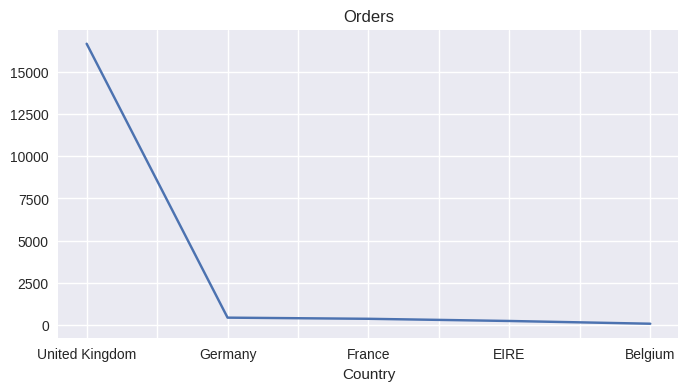

In [ ]:
from matplotlib import pyplot as plt
_df_9['Orders'].plot(kind='line', figsize=(8, 4), title='Orders')
plt.gca().spines[['top', 'right']].set_visible(False)